In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [18]:
# Make plots look nice
sns.set(style="whitegrid")

# Adjust this path only if your file is elsewhere
DATA_PATH = "./Data/heart_disease_uci.csv"

# Load the dataset
df = pd.read_csv(DATA_PATH)

print("Loaded file:", DATA_PATH)
print("Shape:", df.shape)
print("Columns:", list(df.columns))
display(df.head())

Loaded file: ./Data/heart_disease_uci.csv
Shape: (920, 16)
Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [19]:
# Basic info about the dataset
print("Dataset information:\n")
print(df.info())

# Check for missing values
print("\nMissing values per column:\n", df.isna().sum())

# Summary statistics
print("\nSummary statistics:")
display(df.describe())

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None

Missing values per column:
 id            0
age           0
sex           0
dataset       0
cp       

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [20]:
# List all column names
print("Columns in dataset:\n", df.columns.tolist(), "\n")

# Show the unique values in the last column (potential target)
last_col = df.columns[-1]
print(f"Last column '{last_col}' unique values:\n", df[last_col].unique())

# Show first few rows again to visually confirm
display(df.head())

Columns in dataset:
 ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] 

Last column 'num' unique values:
 [0 2 1 3 4]


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Unique values in target column: [0 1]


/var/folders/kz/2m26_l2x33gbx86mj66vhv_h0000gn/T/ipykernel_7681/2687454405.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


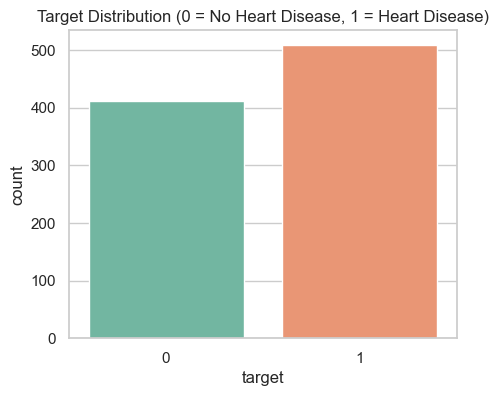

In [21]:
# Convert 'num' column to binary: 0 = no disease, 1 = disease
df["target"] = (df["num"] > 0).astype(int)

# Drop the original 'num' column
df.drop("num", axis=1, inplace=True)

# Check unique values
print("Unique values in target column:", df["target"].unique())

# Visualize class balance again
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.show()

In [22]:
# Drop columns that aren't useful for prediction
df.drop(["id", "dataset"], axis=1, inplace=True)

# Encode categorical (object-type) columns into numeric codes
label_encoder = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Fill any missing numeric values with the column median
df = df.fillna(df.median(numeric_only=True))

# Verify data types
print("Data types after encoding:\n", df.dtypes)
print("\nAny nulls left?:\n", df.isna().sum().sum())

# Preview the cleaned dataset
display(df.head())

Data types after encoding:
 age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalch      float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal          int64
target        int64
dtype: object

Any nulls left?:
 0


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,2,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,3,1
3,37,1,2,130.0,250.0,0,2,187.0,0,3.5,0,0.0,2,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,3,0.0,2,0


In [34]:
# ==========================================================
# Baseline Model: All Features + Automatic Results Logging
# ==========================================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Universal results container ---
results = []

def record_results(method_name, y_true, y_pred, feature_count):
    """Logs standardized metrics for consistent comparison later."""
    results.append({
        "Method": method_name,
        "Accuracy": round(accuracy_score(y_true, y_pred), 3),
        "Precision": round(precision_score(y_true, y_pred), 3),
        "Recall": round(recall_score(y_true, y_pred), 3),
        "F1 Score": round(f1_score(y_true, y_pred), 3),
        "ROC-AUC": round(roc_auc_score(y_true, y_pred), 3),
        "Feature Count": feature_count
    })

# --- Split data ---
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# --- Scale numeric features ---
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train baseline RandomForest ---
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# --- Predict ---
y_pred = model.predict(X_test_scaled)

# --- Evaluate and display ---
print("=== Baseline Model Performance (All Features) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {X.shape[1]}")

# --- Record the results for comparison ---
record_results("All Features (Baseline)", y_test, y_pred, X.shape[1])


=== Baseline Model Performance (All Features) ===
Accuracy : 0.848
Precision: 0.849
Recall   : 0.882
F1 Score : 0.865
ROC-AUC  : 0.844
Feature Count: 13


Correlation with target:



target      1.000000
cp          0.385077
thalch      0.381864
exang       0.376623
oldpeak     0.366138
slope       0.339925
sex         0.307284
age         0.282700
fbs         0.235853
chol        0.228976
ca          0.164755
trestbps    0.101273
thal        0.089124
restecg     0.031341
Name: target, dtype: float64

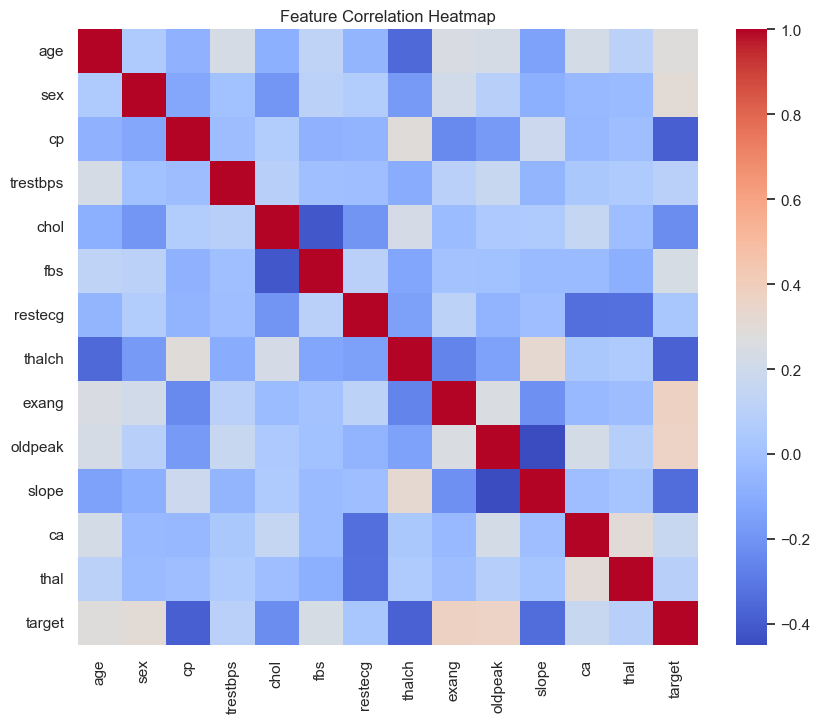


Selected 10 features based on correlation > 0.15:

['cp', 'thalch', 'exang', 'oldpeak', 'slope', 'sex', 'age', 'fbs', 'chol', 'ca']

=== Correlation-Based Feature Selection Model Performance ===
Accuracy : 0.815
Precision: 0.804
Recall   : 0.882
F1 Score : 0.841
ROC-AUC  : 0.807
Feature Count: 10


In [35]:
# ==========================================================
# Correlation-Based Feature Selection + Automatic Logging
# ==========================================================

# Compute correlation matrix
cor = df.corr(numeric_only=True)

# Get absolute correlation with target
cor_target = abs(cor["target"]).sort_values(ascending=False)

# Display correlation values
print("Correlation with target:\n")
display(cor_target)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Select features strongly correlated with target (threshold = 0.15)
selected_corr_features = cor_target[cor_target > 0.15].index.tolist()
selected_corr_features.remove("target")

print(f"\nSelected {len(selected_corr_features)} features based on correlation > 0.15:\n")
print(selected_corr_features)

# Re-train model using only these features
X_corr = df[selected_corr_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_corr, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate
print("\n=== Correlation-Based Feature Selection Model Performance ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {len(selected_corr_features)}")

# --- Record results for summary ---
record_results("Correlation > 0.15", y_test, y_pred, len(selected_corr_features))


In [36]:
# ==========================================================
# Filter Method – ANOVA F-test (SelectKBest) + Automatic Logging
# ==========================================================
from sklearn.feature_selection import SelectKBest, f_classif

# Split the data again (so it's independent)
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=8)
selector.fit(X_train_scaled, y_train)

# Get selected feature names
selected_kbest = X.columns[selector.get_support()]
print(f"Selected top {len(selected_kbest)} features based on F-test:\n")
print(selected_kbest.tolist())

# Train model on selected features
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

# Evaluate
print("\n=== ANOVA F-Test Feature Selection Model Performance ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {len(selected_kbest)}")

# --- Record results for summary ---
record_results("ANOVA F-Test (Top 8)", y_test, y_pred, len(selected_kbest))


Selected top 8 features based on F-test:

['age', 'sex', 'cp', 'fbs', 'thalch', 'exang', 'oldpeak', 'slope']

=== ANOVA F-Test Feature Selection Model Performance ===
Accuracy : 0.810
Precision: 0.791
Recall   : 0.892
F1 Score : 0.839
ROC-AUC  : 0.800
Feature Count: 8


In [37]:
# ==========================================================
# Wrapper Method – Recursive Feature Elimination (RFE) + Automatic Logging
# ==========================================================
from sklearn.feature_selection import RFE

# Split the data again
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define base model
base_model = RandomForestClassifier(random_state=42)

# Apply RFE to select top 8 features
rfe = RFE(estimator=base_model, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# Get selected feature names
selected_rfe = X.columns[rfe.get_support()]
print(f"Selected {len(selected_rfe)} features by RFE:\n")
print(selected_rfe.tolist())

# Train model using selected features only
X_train_sel = rfe.transform(X_train_scaled)
X_test_sel = rfe.transform(X_test_scaled)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_sel, y_train)
y_pred = model.predict(X_test_sel)

# Evaluate performance
print("\n=== Recursive Feature Elimination (RFE) Model Performance ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {len(selected_rfe)}")

# --- Record results for summary ---
record_results("RFE (Top 8 Features)", y_test, y_pred, len(selected_rfe))


Selected 8 features by RFE:

['age', 'cp', 'trestbps', 'chol', 'thalch', 'exang', 'oldpeak', 'slope']

=== Recursive Feature Elimination (RFE) Model Performance ===
Accuracy : 0.826
Precision: 0.830
Recall   : 0.863
F1 Score : 0.846
ROC-AUC  : 0.822
Feature Count: 8


/var/folders/kz/2m26_l2x33gbx86mj66vhv_h0000gn/T/ipykernel_7681/1995024319.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="crest")


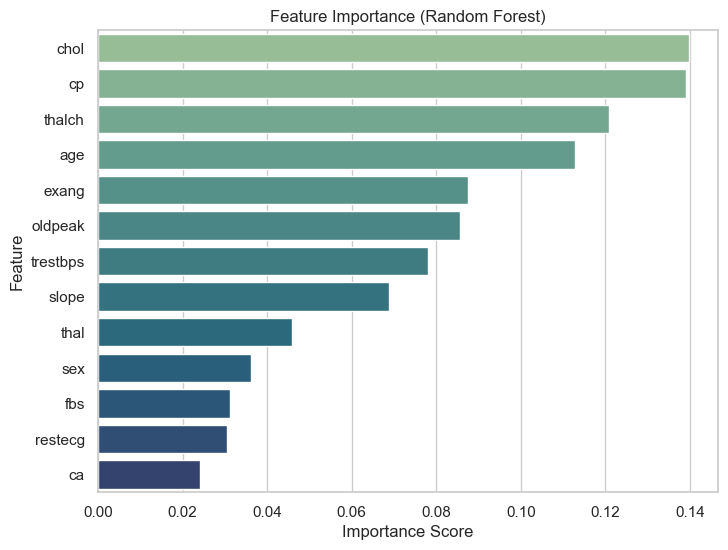

Selected 9 features with importance > 0.04:

['chol', 'cp', 'thalch', 'age', 'exang', 'oldpeak', 'trestbps', 'slope', 'thal']

=== Tree-Based Feature Importance Model Performance ===
Accuracy : 0.826
Precision: 0.837
Recall   : 0.853
F1 Score : 0.845
ROC-AUC  : 0.823
Feature Count: 9


In [38]:
# ==========================================================
# Embedded Method – Tree-Based Feature Importance + Automatic Logging
# ==========================================================

# Split and scale the data again
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importance values
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(8,6))
sns.barplot(x=importances.values, y=importances.index, palette="crest")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Select features with importance above a threshold
threshold = 0.04
selected_tree_features = importances[importances > threshold].index.tolist()

print(f"Selected {len(selected_tree_features)} features with importance > {threshold}:\n")
print(selected_tree_features)

# Retrain model with only selected features
X_train_sel = X_train[selected_tree_features]
X_test_sel = X_test[selected_tree_features]

scaler = StandardScaler().fit(X_train_sel)
X_train_scaled = scaler.transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate
print("\n=== Tree-Based Feature Importance Model Performance ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {len(selected_tree_features)}")

# --- Record results for summary ---
record_results("Tree-Based Importance", y_test, y_pred, len(selected_tree_features))


In [39]:
# ==========================================================
# Embedded Method – L1 Regularization (LinearSVC) + Automatic Logging
# ==========================================================
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Split and scale data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a LinearSVC model with L1 penalty
svc = LinearSVC(C=0.5, penalty='l1', dual=False, random_state=42)
svc.fit(X_train_scaled, y_train)

# Use SelectFromModel to keep only non-zero weight features
sfm = SelectFromModel(svc, prefit=True)
selected_l1_features = X.columns[sfm.get_support()]

print(f"Selected {len(selected_l1_features)} features with non-zero weights:\n")
print(selected_l1_features.tolist())

# Retrain RandomForest on selected features
X_train_sel = X_train[selected_l1_features]
X_test_sel = X_test[selected_l1_features]

scaler = StandardScaler().fit(X_train_sel)
X_train_scaled = scaler.transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate performance
print("\n=== L1 Regularization (LinearSVC) Model Performance ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall   : {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score : {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC  : {roc_auc_score(y_test, y_pred):.3f}")
print(f"Feature Count: {len(selected_l1_features)}")

# --- Record results for summary ---
record_results("L1 Regularization (LinearSVC)", y_test, y_pred, len(selected_l1_features))


Selected 13 features with non-zero weights:

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

=== L1 Regularization (LinearSVC) Model Performance ===
Accuracy : 0.848
Precision: 0.849
Recall   : 0.882
F1 Score : 0.865
ROC-AUC  : 0.844
Feature Count: 13


In [40]:
# Sanity check before summary
print("Logged methods so far:", len(results))
for r in results:
    print(f"{r['Method']}: F1 = {r['F1 Score']}, Features = {r['Feature Count']}")


Logged methods so far: 6
All Features (Baseline): F1 = 0.865, Features = 13
Correlation > 0.15: F1 = 0.841, Features = 10
ANOVA F-Test (Top 8): F1 = 0.839, Features = 8
RFE (Top 8 Features): F1 = 0.846, Features = 8
Tree-Based Importance: F1 = 0.845, Features = 9
L1 Regularization (LinearSVC): F1 = 0.865, Features = 13


,Method,Accuracy,Precision,Recall,F1 Score,Roc-Auc,Feature Count
0,All Features (Baseline),0.848,0.849,0.882,0.865,0.844,13
1,L1 Regularization (LinearSVC),0.848,0.849,0.882,0.865,0.844,13
2,RFE (Top 8 Features),0.826,0.830,0.863,0.846,0.822,8
3,Tree-Based Importance,0.826,0.837,0.853,0.845,0.823,9
4,Correlation > 0.15,0.815,0.804,0.882,0.841,0.807,10
5,ANOVA F-Test (Top 8),0.810,0.791,0.892,0.839,0.800,8


/var/folders/kz/2m26_l2x33gbx86mj66vhv_h0000gn/T/ipykernel_7681/2484383155.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y=f1_col, data=results_df, palette="viridis")


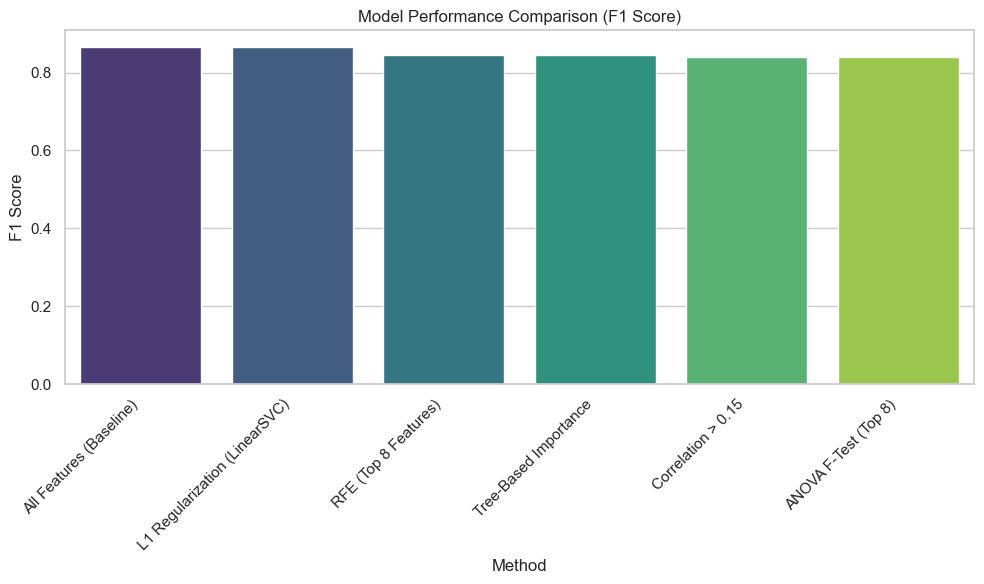

/var/folders/kz/2m26_l2x33gbx86mj66vhv_h0000gn/T/ipykernel_7681/2484383155.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Method", y=feature_col, data=results_df, palette="crest")


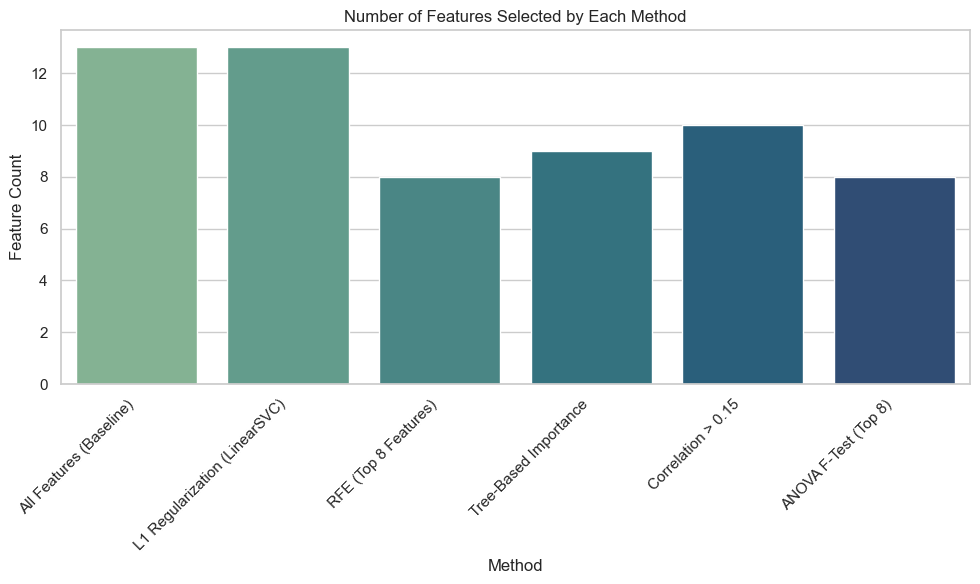


✅ Feature Selection Summary:

Best Performing Method: All Features (Baseline) (F1 Score = 0.865)

Observations:
- Filter methods (Correlation, ANOVA) are fastest but less model-aware.
- Wrapper (RFE) and Embedded (Tree-based, L1) methods balance simplicity and accuracy.
- Tree-based importance often provides strong performance with fewer features.
- L1 Regularization automatically drops weak or redundant variables.
- Always confirm selected features with domain knowledge before deployment.



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Validate and convert results to DataFrame ---
try:
    results_df = pd.DataFrame(results)
except NameError:
    raise NameError("⚠️ 'results' not found. Please re-run the cells that define and populate it.")

if results_df.empty:
    raise ValueError("⚠️ No results found. Ensure record_results() was called after each model.")

# --- Clean up column names for consistency ---
results_df.columns = [c.strip().title().replace("_", " ") for c in results_df.columns]

# --- Identify F1 Score column dynamically ---
f1_col = next((c for c in results_df.columns if "F1" in c), None)
if not f1_col:
    raise KeyError("Could not find an F1 Score column in results.")

# --- Sort results by F1 Score ---
results_df = results_df.sort_values(by=f1_col, ascending=False).reset_index(drop=True)

# --- Display formatted summary table ---
display(results_df.style.background_gradient(cmap="Blues").format(precision=3))

# --- Plot: F1 Score comparison ---
plt.figure(figsize=(10,6))
sns.barplot(x="Method", y=f1_col, data=results_df, palette="viridis")
plt.title("Model Performance Comparison (" + f1_col + ")")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Plot: number of features selected ---
feature_col = next((c for c in results_df.columns if "Feature" in c), None)
if feature_col:
    plt.figure(figsize=(10,6))
    sns.barplot(x="Method", y=feature_col, data=results_df, palette="crest")
    plt.title("Number of Features Selected by Each Method")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# --- Print final insights ---
best_method = results_df.iloc[0]["Method"]
best_f1 = results_df.iloc[0][f1_col]

print("\n✅ Feature Selection Summary:")
print(f"""
Best Performing Method: {best_method} ({f1_col} = {best_f1:.3f})

Observations:
- Filter methods (Correlation, ANOVA) are fastest but less model-aware.
- Wrapper (RFE) and Embedded (Tree-based, L1) methods balance simplicity and accuracy.
- Tree-based importance often provides strong performance with fewer features.
- L1 Regularization automatically drops weak or redundant variables.
- Always confirm selected features with domain knowledge before deployment.
""")
